In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fast-food-sales-report/Balaji Fast Food Sales.csv
/kaggle/input/fast-food-sales-report/category distribution.JPG


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/fast-food-sales-report/Balaji Fast Food Sales.csv')
df.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,05-03-2022,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,12/22/2022,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,06-10-2022,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,9/16/2022,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


In [4]:
df.info()
print('---------------')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB
---------------
          order_id   item_price     quantity  transaction_amount
count  1000.000000  1000.000000  1000.000000         1000.000000
mean    500.500000    33.315000     8.162000          275.230000
std     288.819436    14.921744     4.413075          20

* The data contains values from April 2022 to March 2023.
* The cheapest item is 20 and the most expensive item is 60 whilst the average price per item is 33.32.
* The least spent on a transaction is 20 whilst the most spent is 900. The least quantity sold per transaction is 1 whilst the most quantity sold is 15. The average transaction amount is 204.40. The average quantity sold is 8.16 per transaction.

In [5]:
# most selling items
# most selling hours 
# employee performance
# time series analysis
# items per transaction
# total sales by item type and item name
# avg transaction amount by transaction type
# most selling products, online vs cash transactions
# online hours 
# most sold items per transaction?

In [6]:
df['date'] = df['date'].str.replace('/', '-')
df['date'] = pd.to_datetime(df['date'])

# Extract month and year
df['month'] = df['date'].dt.strftime('%b')
df['year'] = df['date'].dt.year
df['month_year'] = df['date'].dt.strftime('%b %Y')

In [7]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,month,year,month_year
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night,Jul,2022,Jul 2022
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,Aug,2022,Aug 2022
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,Nov,2022,Nov 2022
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,Feb,2023,Feb 2023
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,Oct,2022,Oct 2022


  time_of_sale  order_id
0    Afternoon        24
1      Evening        16
2     Midnight        22
3      Morning        22
4        Night        23
----------------
  received_by  order_id
0         Mr.        53
1        Mrs.        54
transaction_type
Cash       476
Online     417
Unknown    107
Name: count, dtype: int64


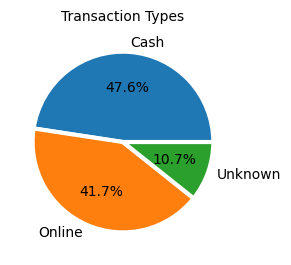

In [8]:
#lets inspect the rows contains null values to see if there is a pattern 
df_null = df[df['transaction_type'].isna()]
print(df_null.groupby('time_of_sale')['order_id'].count().reset_index())
print('----------------')
print(df_null.groupby('received_by')['order_id'].count().reset_index())

# there seems to be no particular pattern among the null values in the transaction_amount column. 
# we will treat null values as its own category thus replace the null values with 'unknown'

df['transaction_type'] = df['transaction_type'].fillna('Unknown')
transaction_type = df['transaction_type'].value_counts()
print(transaction_type)

fig, ax = plt.subplots(figsize=(3, 3))

ax.pie(transaction_type, labels=transaction_type.index, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
ax.set_title('Transaction Types', fontsize=10)
plt.tight_layout()

In [9]:
df[['item_name', 'item_price']].drop_duplicates().sort_values('item_price', ascending=False).reset_index(drop=True)

,item_name,item_price
0,Sandwich,60
1,Frankie,50
2,Cold coffee,40
3,Sugarcane juice,25
4,Aalopuri,20
5,Vadapav,20
6,Panipuri,20


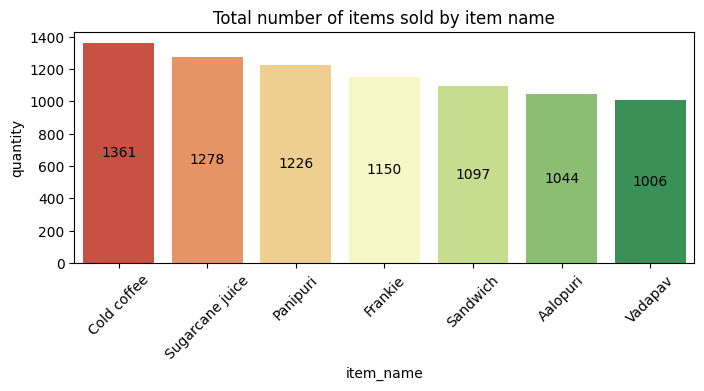

In [10]:
# top performing items
items_quantity = df.groupby('item_name')['quantity'].sum().reset_index().sort_values('quantity', ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot(items_quantity, x='item_name', y='quantity', palette='RdYlGn')
ax.bar_label(ax.containers[0], label_type='center')
plt.xticks(rotation=45)
plt.title('Total number of items sold by item name')
plt.show()

In [11]:
pd.pivot_table(df, columns='time_of_sale', index='item_name', values='order_id', aggfunc='count')

time_of_sale,Afternoon,Evening,Midnight,Morning,Night
item_name,,,,,
Aalopuri,29,19,33,27,26
Cold coffee,34,30,26,32,39
Frankie,31,29,22,23,34
Panipuri,28,36,31,29,26
Sandwich,19,29,26,25,30
Sugarcane juice,41,32,28,25,27
Vadapav,23,26,33,29,23


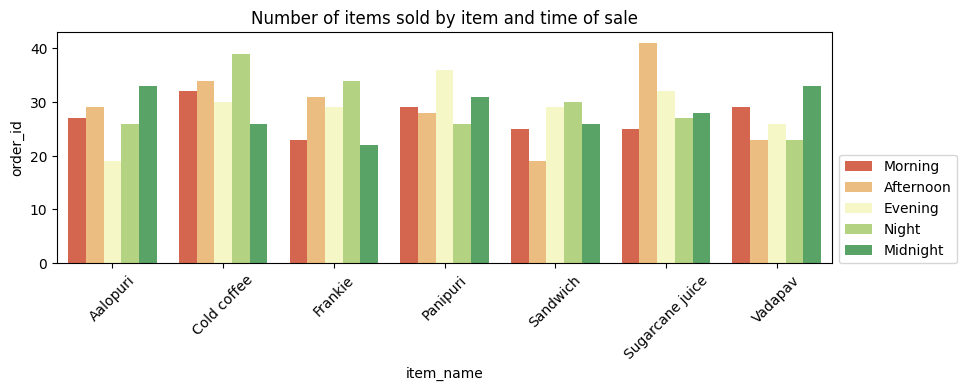

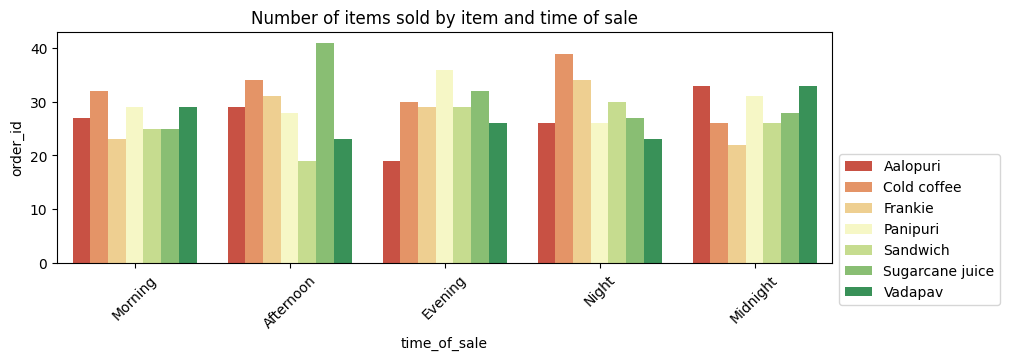

In [12]:
items_by_time = df.groupby(['item_name', 'time_of_sale'])['order_id'].count().reset_index()

plt.figure(figsize=(10,3))
order = ['Morning', 'Afternoon', 'Evening', 'Night', 'Midnight']
sns.barplot(items_by_time, x='item_name', y='order_id', hue='time_of_sale',palette='RdYlGn',hue_order=order)
plt.title('Number of items sold by item and time of sale')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,3))
order = ['Morning', 'Afternoon', 'Evening', 'Night', 'Midnight']
sns.barplot(items_by_time, x='time_of_sale', y='order_id', hue='item_name',palette='RdYlGn', order=order)
plt.title('Number of items sold by item and time of sale')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.show()

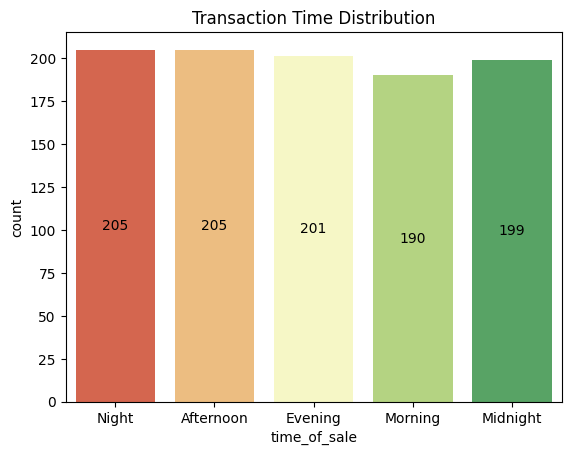

In [13]:
ax = sns.countplot(df, x='time_of_sale', palette='RdYlGn')
plt.title('Transaction Time Distribution')

ax.bar_label(ax.containers[0],label_type='center')
plt.show()

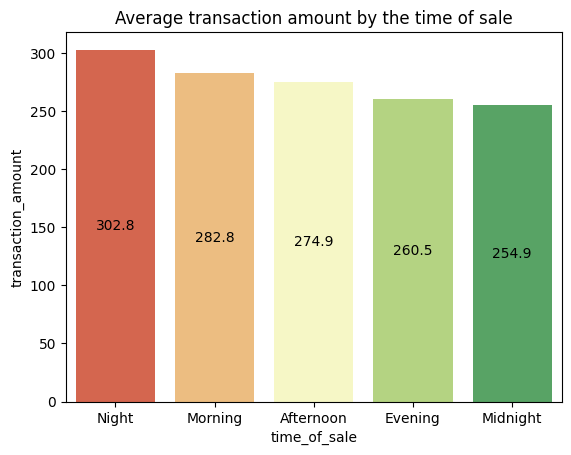

In [14]:
avg_transaction_timeofsale = df.groupby('time_of_sale')['transaction_amount'].mean().sort_values(ascending=False).reset_index()
ax = sns.barplot(avg_transaction_timeofsale, x='time_of_sale', y='transaction_amount',palette='RdYlGn')
plt.title('Average transaction amount by the time of sale')

ax.bar_label(ax.containers[0],label_type='center',fmt='%.1f')
plt.show()

* Most expensive item on the menu is sandwich and its price is 60. Least expensive item on the menu is vadapav, aalopuri and panipuri and their price is 20.
* High performing products are cold coffee, sugarcane juice and panipuri. Low performing products are vadapav, aalopuri and sandwich.
* Cold coffee sales peak at night and drop the lowest at midnight.
* Time of sale analysis;
    * Most selling items in the morning are cold coffee, panipuri and vadapav. 
    * Most selling items in the afternoon are sugarcane juice, cold coffee and frankie. 
    * Most selling items in the evening are panipuri, sugarcane juice and cold coffee. 
    * Most selling items at night are cold coffee, frankie and sandwich. 
    * Most selling items at midnight are aalopuri, vadapav and panipuri. 
    * The average transaction amount was higher at night compared than the other times of sale whilst at midnight it was lowest.

In [15]:
# online transactions
online_transactions = df[df['transaction_type']=='Online']
online_transactions['time_of_sale'].value_counts()

time_of_sale
Night        90
Afternoon    90
Evening      82
Midnight     79
Morning      76
Name: count, dtype: int64

In [16]:
pd.pivot_table(df, columns='time_of_sale', index='transaction_type', values='order_id', aggfunc='count')

time_of_sale,Afternoon,Evening,Midnight,Morning,Night
transaction_type,,,,,
Cash,91,103,98,92,92
Online,90,82,79,76,90
Unknown,24,16,22,22,23


* There is an increase in online sales in the afternoon and at night.
* Cash transactions increased in the evening.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


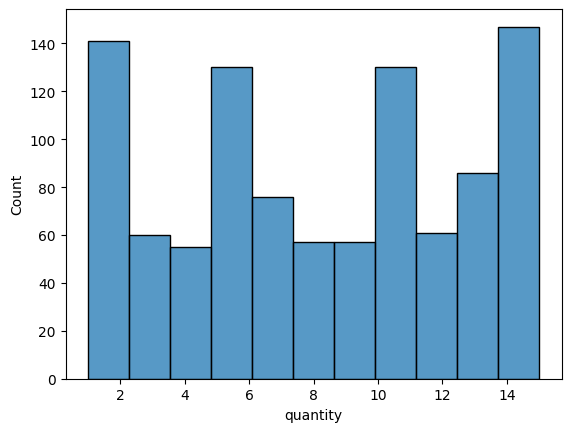

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


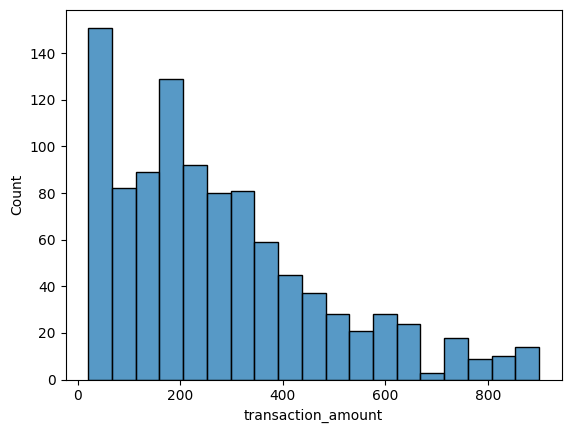

In [17]:
sns.histplot(df['quantity'])
plt.show()
sns.histplot(df['transaction_amount'])
plt.show()

/tmp/ipykernel_18/1648704370.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month_year'] = pd.to_datetime(df['month_year'])


Model evaluation:
MAE: 1511.91
MSE: 2906718.66
RMSE: 1704.91
R²: 0.32
Model evaluation:
MAE: 1828.61
MSE: 5278562.67
RMSE: 2297.51
R²: 0.18


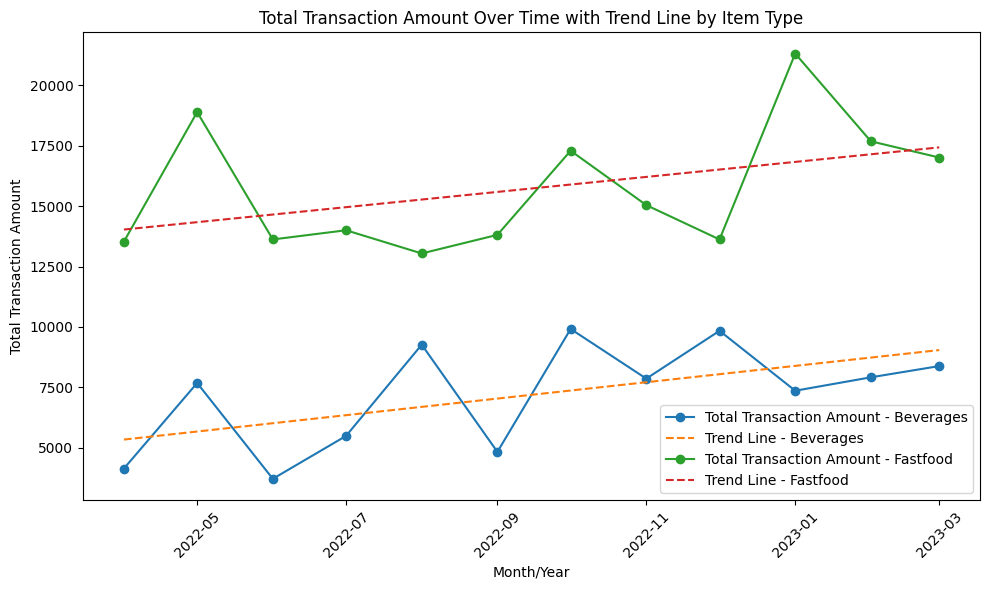

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert 'month_year' to datetime format
df['month_year'] = pd.to_datetime(df['month_year'])

# Group by 'month_year' and sum 'transaction_amount' for each 'item_type'
total_transaction_per_month = df.groupby(['month_year', 'item_type'])['transaction_amount'].sum().reset_index()

# Convert 'month_year' to ordinal values for regression
total_transaction_per_month['month_year_ordinal'] = total_transaction_per_month['month_year'].apply(lambda x: x.toordinal())

# Perform linear regression for each item type
plt.figure(figsize=(10, 6))

# to plot two trend lines iterate through each item type

for item_type in total_transaction_per_month['item_type'].unique():
    # Filter data for current item type
    data = total_transaction_per_month[total_transaction_per_month['item_type'] == item_type]
    
    # reshape filtered data into a 2-dimensional array ((-1, 1)), which is necessary for input to the LinearRegression model
    X = data['month_year_ordinal'].values.reshape(-1, 1)
    y = data['transaction_amount'].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate MAE, MSE, RMSE, and R²
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    
    print(f'Model evaluation:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}')
    
    # Plot data and trend line for current item type
    plt.plot(data['month_year'], data['transaction_amount'], marker='o', linestyle='-', label=f'Total Transaction Amount - {item_type}')
    plt.plot(data['month_year'], y_pred, linestyle='--', label=f'Trend Line - {item_type}')

plt.xlabel('Month/Year')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount Over Time with Trend Line by Item Type')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Model Performance:

The R² scores of 0.32 and 0.18 are relatively low, indicating that the model does not explain much of the variance in the transaction amount. This suggests that the linear relationship between the date and transaction amount might not be strong.
The MAE, MSE, and RMSE values are quite high, which indicates significant prediction errors.
Possible Reasons for Poor Performance:

Non-Linearity: The relationship between month_year and transaction_amount may not be linear. Other patterns or trends might be present that a linear model cannot capture.
Missing Features: Other features (e.g., seasonality, promotions, economic factors) might influence the transaction amount and are not included in the model.|